#### Projet AVC

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('drive')
os.listdir('Mydrives/ProjetAVC/data_colabs')

#os.listdir('MyDrive/data_colabs')

#### Importation des données

In [ ]:
data = pd.read_csv('Shareddrives/ProjetAVC/data_colabs/healthcare_data.csv', sep=",")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Vérification de l'unicité des données
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
# On spécifie l'index de notre JDD qui correspond à "id"
data.set_index("id", inplace=True)
data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


##### Structure des données

In [ ]:
data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
data[data.work_type=="children"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
33759,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
55680,Male,13.00,0,0,No,children,Urban,114.84,18.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0


In [ ]:
data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
#data_transf[data_transf.index==69768]

Sur les 5 premières lignes on peut voir que chaque ligne répresente un individu. Chaque individu est caratérisé par 12 variables: un identifiant "id", "gender", "age", s'il a l'hypertension "hypertension", s'il a une maladie du coeur"heart_disease", s'il n'a jamais été marié"ever_married", son type de travail "work_type", son type de résidence "Residence_type", son niveau moyen de glucose "avg_glucose_level", son indice de masse corporel (IMC en français) "bmi", son statut de fumeur "smoking_statu", s'il a fait un avc"stroke".  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


Le jeu de donnée contient 5110 observations et 12 colonnes, ce qui signifie qu'il est relativement petit pour un jeu d'apprentissage automatique, mais pas mal déjà dans le plan académique.
Seule la variable de masse corporelle "bmi" contient des valeurs manquantes.
Il y'a aussi bien des variables qualitative("gender","ever_married","wwork_type","Residence_type","smoking_status") que des variables quantitative ("age","hypertension","heart_disease","avg_glucose_level","bmi","stroke")

In [ ]:
# Proportion des genre dans le JDD
pd.DataFrame({'value_sex':data.gender.value_counts(),"value_rate ": data.gender.value_counts()/data.gender.count()})

,value_sex,value_rate
Female,2994,0.585910
Male,2115,0.413894
Other,1,0.000196


Les femmes représentent près de 59% du JDD contre 41% pour les hommes.
Il y'a aussi 1 individu de genre ni femme ni homme mais il est très négligeable dans le JDD pour qu'on en tienne compte.
Pour ne pas risquer de biaisé les résultats dans la suite, il serait judiciable qu'on supprime cet individu du JDD.

In [ ]:
# Suppression de l'individu dont le genre a pour modalité "Other"
data.drop(data.loc[data.gender=="Other"].index,inplace=True)
pd.DataFrame({'value_sex':data.gender.value_counts(),"value_rate ": data.gender.value_counts()/data.gender.count()})

,value_sex,value_rate
Female,2994,0.586025
Male,2115,0.413975


In [ ]:
# Proportion des genres ayant fais un AVC sur le total d'individu dans le JDD 
pd.DataFrame({'value_avc_sex':data[data.stroke==1]["gender"].value_counts(),"value_rate ": data[data.stroke==1]["gender"].value_counts()/data[data.stroke==1]["gender"].count()})

,value_avc_sex,value_rate
Female,141,0.566265
Male,108,0.433735


In [ ]:
#proportion des personnes ayant fais ou non un AVC
pd.DataFrame({"value_count":data.stroke.value_counts(),"values_rate":data.stroke.value_counts()/data.shape[0]})

,value_count,values_rate
0,4860,0.951262
1,249,0.048738


Le JDD contient 95% des pesonnes n'ayant pas fais d'avc contre près de 5% uniquement qui en ont fait ce qui fait un JDD très déséquilibré.
Un tel JDD, donnera des précisions proche de 1 mais les performances du modèle ne serait pas du tout bonne.
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/discussion/232298

Pour équilibrer le JDD, on pourait penser à faire un sur-échantillonnage des données.
https://datascientest.com/comment-gerer-les-problemes-de-classification-desequilibree-partie-ii

In [ ]:
# proportion en foction du total par genre
print("% Femme AVC: ", data[(data["gender"]=="Female") & (data["stroke"]==1)]["gender"].count()/data[data["gender"]=="Female"]["gender"].count() *100)
print("% Homme AVC: ", data[(data["gender"]=="Male") & (data["stroke"]==1)]["gender"].count()/data[data["gender"]=="Male"]["gender"].count() *100)

% Femme AVC:  4.709418837675351
% Homme AVC:  5.106382978723404


#### Data cleaning

###### Valeurs manquantes

In [ ]:
## Valeurs manquantes standards

# des valeurs manquantes?
print(data.isnull().values.any())

True


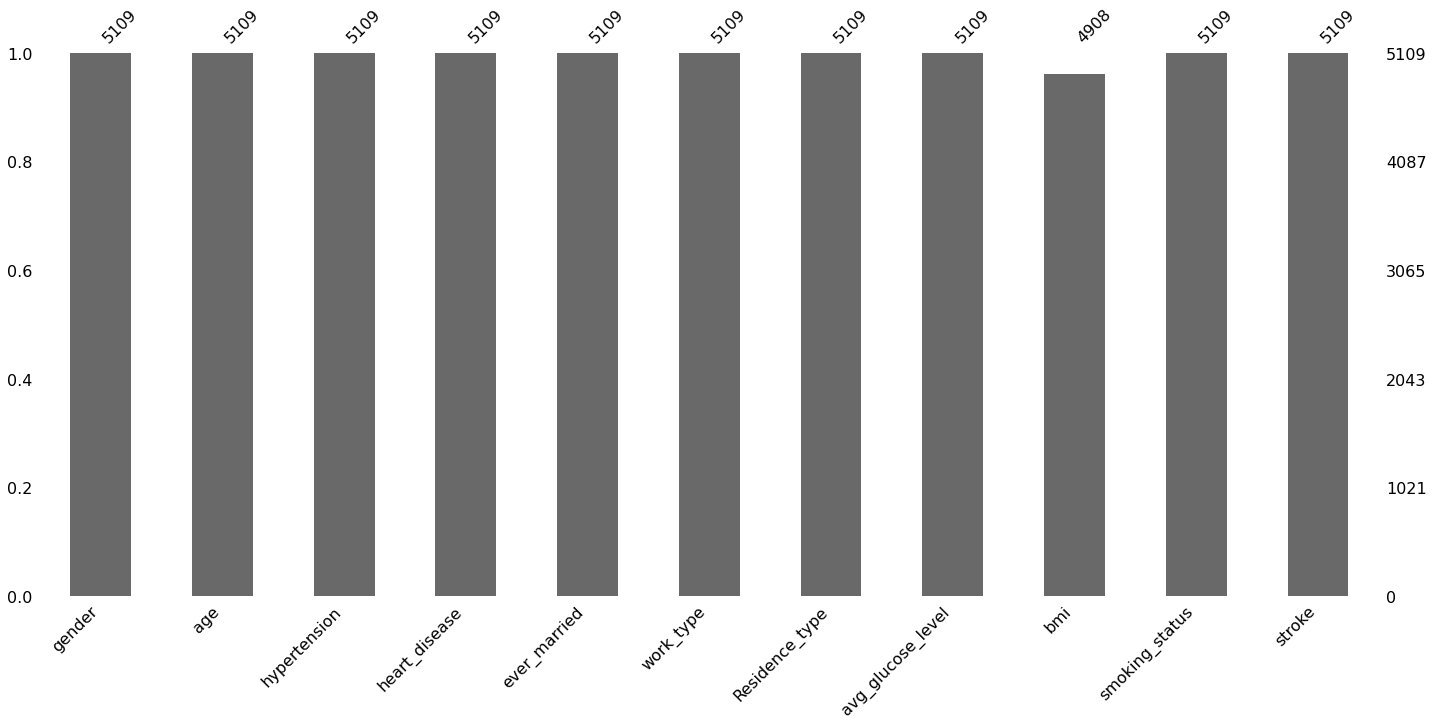

In [ ]:
import missingno as msno
msno.bar(data)
plt.show()

In [ ]:
## Valeurs manquantes non standards

data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

On constate que la variable "smoking_status" a 1544 valeurs inconnus "Unknown". Il serait peut-être judicieux de la considérer comme une modalité à part entière. Ce qui nous éviterait aussi de devoir faire des imputations sur un nombre de données aussi important par rapport au JDD.

In [ ]:
# Si on considère "Unknown" comme un "NAN"
# Faire une liste de types de valeurs manquantes
# missing_values = ["Unknown"]
#data = pd.read_csv('Shareddrives/ProjetAVC/data_colabs/healthcare_data.csv', sep=",", na_values=missing_values)
#data.head()

# Suppression de l'individu dont le genre a pour modalité "Other"
#data.drop(data.loc[data.gender=="Other"].index,inplace=True)

In [ ]:
#Pourcentage des données manquantes
pd.DataFrame({'missing_valeur':data.isna().sum(), 'missing_rate':data.isna().sum()/data.shape[0]*100}).transpose()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
missing_valeur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.000000,0.0,0.0
missing_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.934234,0.0,0.0


In [ ]:
data[data.bmi.isna()]["stroke"].value_counts()

0    161
1     40
Name: stroke, dtype: int64

In [ ]:
data[data.bmi.isna()][["gender","stroke"]].value_counts()

gender  stroke
Male    0         85
Female  0         76
        1         21
Male    1         19
dtype: int64

Il y'a 201 individus dont la masse corporelle (bmi) n'est pas mentionnée ce qui représente près de 4% du JDD, vue la taille de notre JDD c'est un nombre important. Donc on ne peut pas les supprimer surtout qu'on peut facilement attribuer une valeur à la variable (bmi).

#### Statistiques descriptives et univariée

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


Female    2994
Male      2115
Name: gender, dtype: int64


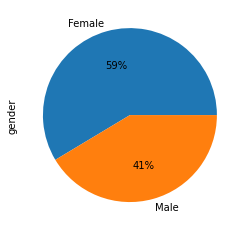

In [ ]:
print(data.gender.value_counts())
data.gender.value_counts().plot(kind='pie', autopct='%1.0f%%')

Yes    3353
No     1756
Name: ever_married, dtype: int64


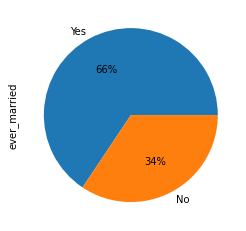

In [ ]:
print(data.ever_married.value_counts())
data.ever_married.value_counts().plot(kind='pie', autopct='%1.0f%%')

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


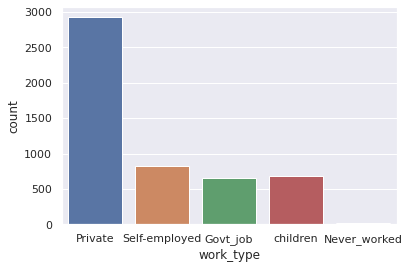

In [ ]:
print(data.work_type.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=data,x='work_type')

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


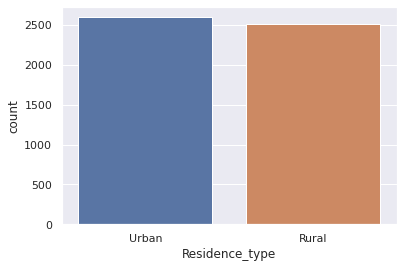

In [ ]:
print(data.Residence_type.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=data,x='Residence_type')

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


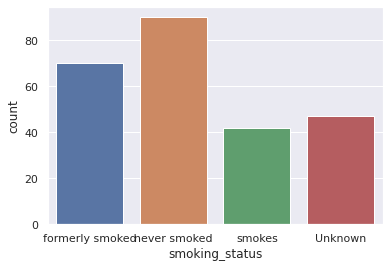

In [ ]:
print(data.smoking_status.value_counts())
ax = sns.countplot(data=data[data.stroke==1],x='smoking_status')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(18.0, 100.0)

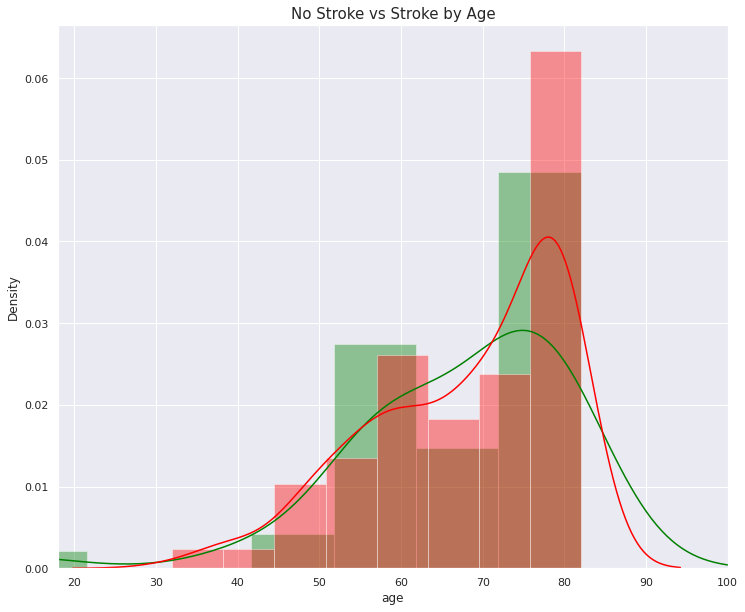

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(data[(data['stroke'] == 1) & (data['smoking_status'] == "Unknown")]["age"],color='green')
sns.distplot(data[(data['stroke'] == 1) & (data['smoking_status'] != "Unknown")]["age"],color='red')
plt.title('No Stroke vs Stroke by Age',fontsize=15)
plt.xlim([18,100])

In [ ]:
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=data,x='work_type')

In [ ]:
print(data.stroke.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=data,x='stroke')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

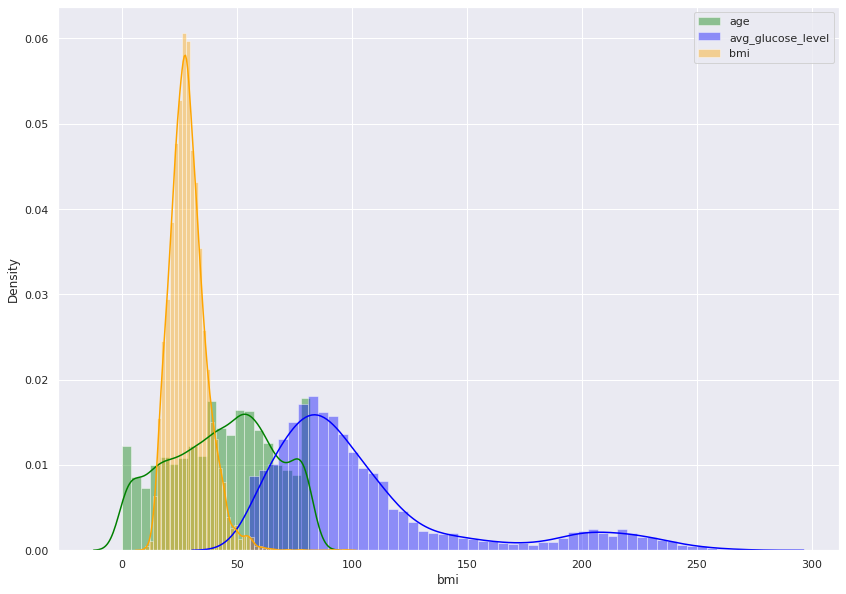

In [ ]:
fig = plt.figure(figsize=(14,10))
sns.distplot(data.age,color='green',label='age',kde=True)
sns.distplot(data.avg_glucose_level,color='blue',label='avg_glucose_level',kde=True)
sns.distplot(data.bmi,color='orange',label='bmi',kde=True)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(18.0, 100.0)

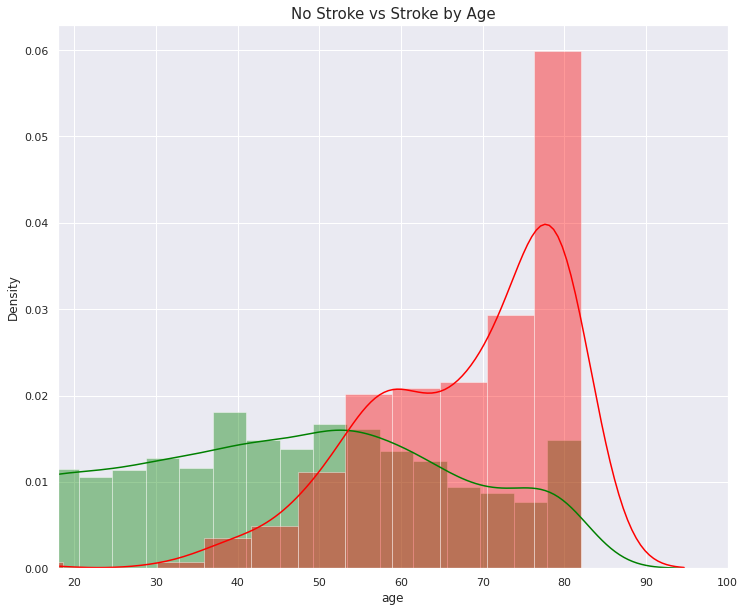

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['stroke'] == 0]['age'],color='green')
sns.distplot(data[data['stroke'] == 1]['age'],color='red')
plt.title('No Stroke vs Stroke by Age',fontsize=15)
plt.xlim([18,100])

In [ ]:
#Affichage des corrélation entre les données
#data[["age","hypertension","heart_disease","avg_glucose_level","bmi","stroke"]].corr()

Text(0.5, -0.15, 'Matrice de corrélation')

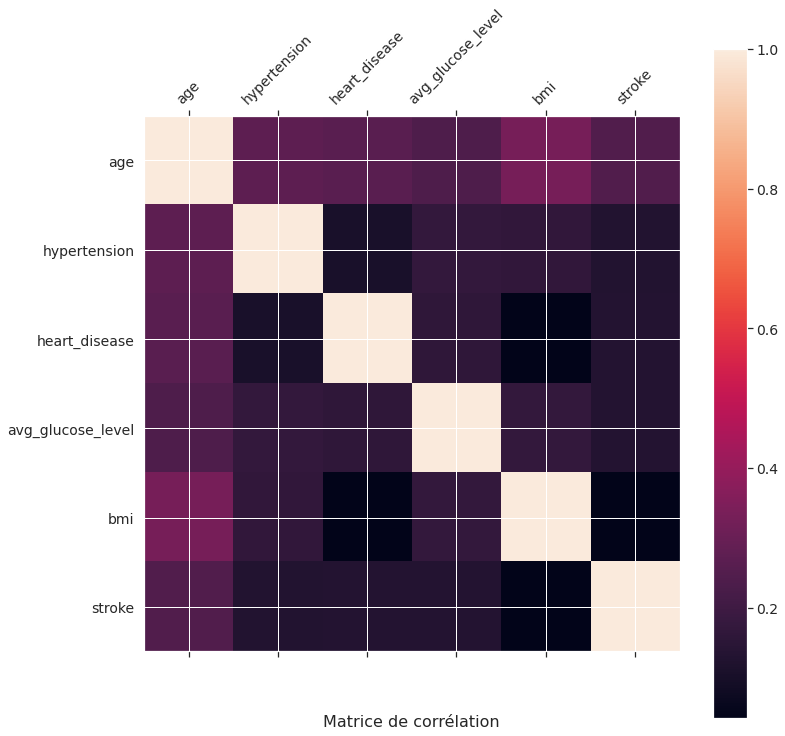

In [ ]:
df = data[["age","hypertension","heart_disease","avg_glucose_level","bmi","stroke"]]
import matplotlib.pyplot as plt
f = plt.figure(figsize=(12, 12))

plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de corrélation', fontsize=16, y=-0.15)

In [ ]:
#sns.heatmap(data.drop(columns=["id"]).corr(), )


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


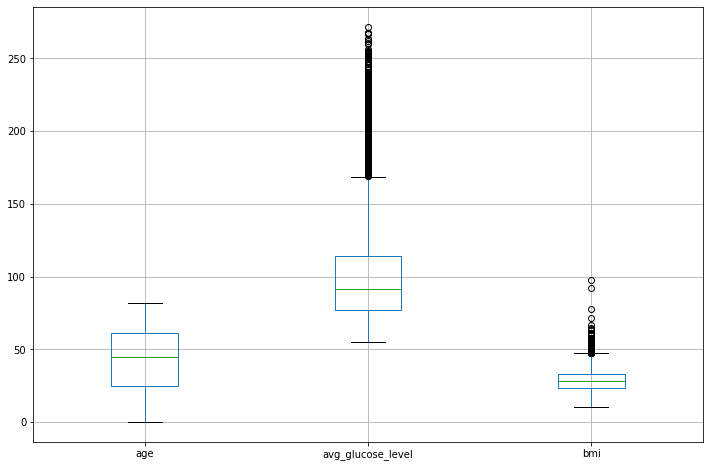

In [ ]:
data[["age","avg_glucose_level","bmi"]].boxplot(figsize=(12,8))

#### Preprocessing

###### Gestion des variables catégorielles

On va utiliser la fonction de pandas (get_dummies()) pour transformer les variables catégorielles en numérique. Le paramètre "drop_first" permet de supprimer la multicolinéarité en supprimant la première colonnes des colonnes crées sur une variable catégorielle.
Pour en savoir plus : https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d

In [ ]:
data_cat = pd.get_dummies(data, drop_first=True)
data_cat.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
51676,61.0,0,0,202.21,NaN,1,0,1,0,0,1,0,0,0,1,0
31112,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0


###### Gestion des valeurs manquantes

In [ ]:
print(data[data.gender=="Female"]["bmi"].median())
print(data[data.gender=="Male"]["bmi"].median())

27.8
28.4


Les valeurs medianes des masses corporelles des  homme et des femme sont différentes. Pour une imputation simple, il serait peut être mieux de faire l'imputation des valeurs maquantes par rapport à chaque sexe. C'est à dire la (bmi) maquantes des hommes imputée par rapport à la mediane de la "bmi" des hommes et de la même façon pour les femmes. 

In [ ]:
# Imputation des valeurs manquantes par la méthodes des plus proche voisin (Meilleur que celle par la moyenne ou la mediane)
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

array = imputer.fit_transform(data_cat)
array

array([[67.,  0.,  1., ...,  1.,  0.,  0.],
       [61.,  0.,  0., ...,  0.,  1.,  0.],
       [80.,  0.,  1., ...,  0.,  1.,  0.],
       ...,
       [35.,  0.,  0., ...,  0.,  1.,  0.],
       [51.,  0.,  0., ...,  1.,  0.,  0.],
       [44.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
data_transf = pd.DataFrame(array, columns=data_cat.columns)
#data_transf.set_index("id", inplace=True)
data_transf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.60,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,31.75,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.50,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


###### Séparation du JDD 

In [ ]:
#data_transf.iloc[:,5]
Y = data_transf["stroke"]
Y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5104    0.0
5105    0.0
5106    0.0
5107    0.0
5108    0.0
Name: stroke, Length: 5109, dtype: float64

In [ ]:
X = data_transf.drop("stroke",axis=1)
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.60,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,31.75,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.50,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.40,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1.0,0.0,83.75,26.85,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5105,81.0,0.0,0.0,125.20,40.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5106,35.0,0.0,0.0,82.99,30.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,51.0,0.0,0.0,166.29,25.60,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
Y.shape

(5109,)

##### Normalisation du JDD

Standardisation (centrage-réduction) des descripteurs. Les variables prédictives étant définies sur des échelles différentes, il est recommandé de les standardiser avant de procéder à un apprentissage. Nous utilisons la classe StandardScaler de la librairie scikit-learn

Nous demandons un centrage (with_mean=True) et réduction (with_std=True) des variables, c-à-d.

nous appliquons la formule : 𝑧𝑖𝑗 = (𝑥𝑖𝑗 − 𝑥̅𝑗)/𝜎𝑗 Où 𝑥̅𝑗 et 𝜎𝑗 sont respectivement la moyenne et l’écart-type de la variable Xj

In [ ]:
# Standardisation des valeurs
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean = True, with_std=True)
data_std = std.fit_transform(X)
data_std

array([[ 1.05124201, -0.32863749,  4.18459909, ...,  2.18618658,
        -0.76689346, -0.42736271],
       [ 0.78588869, -0.32863749, -0.23897152, ..., -0.4574175 ,
         1.30396209, -0.42736271],
       [ 1.6261742 , -0.32863749,  4.18459909, ..., -0.4574175 ,
         1.30396209, -0.42736271],
       ...,
       [-0.3639757 , -0.32863749, -0.23897152, ..., -0.4574175 ,
         1.30396209, -0.42736271],
       [ 0.34363316, -0.32863749, -0.23897152, ...,  2.18618658,
        -0.76689346, -0.42736271],
       [ 0.03405428, -0.32863749, -0.23897152, ..., -0.4574175 ,
        -0.76689346, -0.42736271]])

In [ ]:
data_transf.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [ ]:
X_std = pd.DataFrame(data_std, index=data_transf.index, columns=[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
        'gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']])
X_std

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051242,-0.328637,4.184599,2.706450,0.980257,1.189791,0.723678,-0.065763,0.864444,-0.436931,-0.394157,0.983884,2.186187,-0.766893,-0.427363
1,0.785889,-0.328637,-0.238972,2.121652,0.359193,-0.840484,0.723678,-0.065763,-1.156812,2.288689,-0.394157,-1.016380,-0.457417,1.303962,-0.427363
2,1.626174,-0.328637,4.184599,-0.004867,0.455234,1.189791,0.723678,-0.065763,0.864444,-0.436931,-0.394157,-1.016380,-0.457417,1.303962,-0.427363
3,0.255182,-0.328637,-0.238972,1.437473,0.698537,-0.840484,0.723678,-0.065763,0.864444,-0.436931,-0.394157,0.983884,-0.457417,-0.766893,2.339933
4,1.581949,3.042866,-0.238972,1.501297,-0.633229,-0.840484,0.723678,-0.065763,-1.156812,2.288689,-0.394157,-1.016380,-0.457417,1.303962,-0.427363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1.626174,3.042866,-0.238972,-0.494481,-0.268274,-0.840484,0.723678,-0.065763,0.864444,-0.436931,-0.394157,0.983884,-0.457417,1.303962,-0.427363
5105,1.670400,-0.328637,-0.238972,0.420922,1.415642,-0.840484,0.723678,-0.065763,-1.156812,2.288689,-0.394157,0.983884,-0.457417,1.303962,-0.427363
5106,-0.363976,-0.328637,-0.238972,-0.511266,0.211930,-0.840484,0.723678,-0.065763,-1.156812,2.288689,-0.394157,-1.016380,-0.457417,1.303962,-0.427363
5107,0.343633,-0.328637,-0.238972,1.328375,-0.428342,1.189791,0.723678,-0.065763,0.864444,-0.436931,-0.394157,-1.016380,2.186187,-0.766893,-0.427363


In [ ]:
X_std.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03
mean,3.077275e-16,2.566486e-15,-1.873613e-15,-1.765187e-16,2.969504e-16,-3.685315e-16,-9.878356e-16,-1.758233e-16,-1.199536e-15,3.875241e-16,3.076485e-15,-8.655350e-17,3.632183e-16,8.254201e-16,-1.592863e-17
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00
min,-1.908332e+00,-3.286375e-01,-2.389715e-01,-1.126761e+00,-2.387575e+00,-8.404837e-01,-1.381830e+00,-6.576283e-02,-1.156812e+00,-4.369314e-01,-3.941568e-01,-1.016380e+00,-4.574175e-01,-7.668935e-01,-4.273627e-01
25%,-8.062312e-01,-3.286375e-01,-2.389715e-01,-6.382516e-01,-6.844508e-01,-8.404837e-01,-1.381830e+00,-6.576283e-02,-1.156812e+00,-4.369314e-01,-3.941568e-01,-1.016380e+00,-4.574175e-01,-7.668935e-01,-4.273627e-01
50%,7.827984e-02,-3.286375e-01,-2.389715e-01,-3.149342e-01,-1.082059e-01,-8.404837e-01,7.236782e-01,-6.576283e-02,8.644443e-01,-4.369314e-01,-3.941568e-01,9.838840e-01,-4.574175e-01,-7.668935e-01,-4.273627e-01
75%,7.858887e-01,-3.286375e-01,-2.389715e-01,1.755632e-01,5.320663e-01,1.189791e+00,7.236782e-01,-6.576283e-02,8.644443e-01,-4.369314e-01,-3.941568e-01,9.838840e-01,-4.574175e-01,1.303962e+00,-4.273627e-01
max,1.714625e+00,3.042866e+00,4.184599e+00,3.657189e+00,8.791577e+00,1.189791e+00,7.236782e-01,1.520616e+01,8.644443e-01,2.288689e+00,2.537062e+00,9.838840e-01,2.186187e+00,1.303962e+00,2.339933e+00


###### Subdivision en échantillon d'apprentissage et de test
Nous partitionnons les données en 75% observations pour l'apprentissage, 25% pour le test. Nous nous assurons d'avoir les même propostion d'observations positives dans les deux sous-échatillons par un tirage stractifié

In [ ]:
## Séparation du JDD en Train/Test
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
print(Xtrain, ytrain)

        age  hypertension  ...  smoking_status_never smoked  smoking_status_smokes
3999  24.00           0.0  ...                          1.0                    0.0
3575  41.00           0.0  ...                          0.0                    0.0
3032  52.00           0.0  ...                          0.0                    0.0
1867  55.00           0.0  ...                          0.0                    0.0
494   55.00           0.0  ...                          0.0                    0.0
...     ...           ...  ...                          ...                    ...
4426  61.00           0.0  ...                          1.0                    0.0
466   61.00           1.0  ...                          0.0                    1.0
3092   1.16           0.0  ...                          0.0                    0.0
3772  38.00           0.0  ...                          1.0                    0.0
860   46.00           0.0  ...                          0.0                    1.0

[38

In [ ]:
print(Xtest, ytest)

       age  hypertension  ...  smoking_status_never smoked  smoking_status_smokes
4687  31.0           0.0  ...                          0.0                    0.0
4477  40.0           0.0  ...                          1.0                    0.0
3520  52.0           0.0  ...                          1.0                    0.0
4354  79.0           1.0  ...                          1.0                    0.0
3825  75.0           0.0  ...                          1.0                    0.0
...    ...           ...  ...                          ...                    ...
1533  54.0           0.0  ...                          1.0                    0.0
2437   8.0           0.0  ...                          0.0                    0.0
3164  50.0           0.0  ...                          0.0                    0.0
92    57.0           0.0  ...                          1.0                    0.0
4675  28.0           0.0  ...                          0.0                    1.0

[1278 rows x 15

#### Machine Learning (Test models)

In [ ]:
# import models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
#from sklearn import metrics
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Sur-échantillonnage du JDD
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced

rOs = RandomOverSampler()

#récupération des données xtrain->x_ro et ytrain ->y_ro
X_ro, y_ro = rOs.fit_resample(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
#RandomForestClassifier
pipe = make_pipeline(RandomForestClassifier())
pipe.fit(Xtrain, ytrain) # application sur les données d'entrainnement
pred = pipe.predict(Xtest)
print(pipe.score(Xtest, ytest)) # Application sur les données de test 
print(classification_report_imbalanced(ytest, pred))

In [ ]:
# entrainement du modèle de Random forest Classifier (sur_echantillon)
rfcl = RandomForestClassifier()
rfcl.fit(X_ro, y_ro)

#Affichage des résultats
y_pred = rfcl.predict(Xtest)

print(classification_report_imbalanced(ytest, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.99      0.05      0.96      0.22      0.05      1198
        1.0       0.25      0.05      0.99      0.08      0.22      0.04        80

avg / total       0.90      0.93      0.11      0.91      0.22      0.05      1278



In [ ]:
# Pour optimiser notre algorithme de machine learning (Random forest Classfier). On utilisera la méthode GridSearchCV
# Dans un premier temps on configure les hyperparamètres
 
n_estimators = list(range(100, 401, 150))
max_features = ["sqrt", "log2"]
max_depth = list(range(10, 50, 10))
max_depth.append(None)
min_samples_split = [2, 4]
min_samples_leaf = [2, 5, 10]
bootstrap = [True, False]

param_grid_forest = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap)
print(param_grid_forest)

{'n_estimators': [100, 250, 400], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, None], 'min_samples_split': [2, 4], 'min_samples_leaf': [2, 5, 10], 'bootstrap': [True, False]}


In [ ]:
# On entraine notre modêle avec les paramêtres rebseigné dans le dictionnaire "param_grid_forest" et une cross-validation de 10
grid_search_forest = GridSearchCV(rfcl, param_grid_forest, cv=10, scoring='accuracy')
grid_search_forest.fit(X_ro, y_ro)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
# On récupère la moyenne de chaque résultat
scores_forest = grid_search_forest.cv_results_['mean_test_score']
print(scores_forest)

[0.94511272 0.94497555 0.94429342 0.9440202  0.94456739 0.94688718
 0.93023021 0.9274989  0.93023077 0.93077796 0.92804591 0.92818177
 0.910023   0.91138968 0.91002561 0.90893029 0.90934106 0.90852269
 0.94347412 0.94688774 0.94552181 0.94511253 0.94620562 0.94634167
 0.93050455 0.92872785 0.93200561 0.9280446  0.93050287 0.93036589
 0.9109791  0.90893197 0.90975164 0.90961428 0.91097835 0.90811267
 0.9857998  0.98716537 0.98607284 0.98552639 0.98620945 0.98620908
 0.96026752 0.95985787 0.9613593  0.95985694 0.96067605 0.96122269
 0.93405367 0.93405516 0.93200672 0.93350722 0.93364532 0.93282472
 0.98757502 0.98607247 0.98552658 0.98634644 0.98620983 0.98593604
 0.95862836 0.96149591 0.96149628 0.95958577 0.96054019 0.96176932
 0.93214203 0.93296152 0.93323456 0.93268885 0.93323456 0.93296208
 0.98579962 0.98689214 0.98648249 0.98607284 0.98661873 0.98661892
 0.96095039 0.96013035 0.96190556 0.95985713 0.95999355 0.96095021
 0.9340533  0.93296114 0.93350741 0.93309571 0.93378138 0.9322

In [ ]:
# On récupère les meilleurs paramêtres qui nous permettra d'entrainer notre modèle
print(grid_search_forest.best_score_)

print(grid_search_forest.best_params_)

best_params_forest = grid_search_forest.best_params_

0.9941281059199785
{'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 250}


In [ ]:
rfcl = RandomForestClassifier(n_estimators=best_params_forest['n_estimators'], max_depth=best_params_forest['max_depth'], bootstrap=best_params_forest['bootstrap'], max_features=best_params_forest['max_features'], min_samples_leaf=best_params_forest['min_samples_leaf'], min_samples_split=best_params_forest['min_samples_split'])
rfcl.fit(X_ro, y_ro)

predict_rfcl = rfcl.predict(Xtest)

In [ ]:
#On calcule la précision
accuracy_score(predict_rfcl, ytest)

0.9295774647887324

In [ ]:
#On regarde en profondeur le resutat via une confusion matrix afin de voir si notre modèle réussi à bien trouver la bonne valeur
confusion_matrix(ytest, predict_rfcl)

array([[1184,   14],
       [  76,    4]])

In [ ]:
#On regarde aussi la précision de notre modèle
print(precision_score(ytest, predict_rfcl))
print(recall_score(ytest, predict_rfcl))
print(f1_score(ytest, predict_rfcl))



0.2222222222222222
0.05
0.0816326530612245


In [ ]:
#LogisticRegression
pipe = make_pipeline(LogisticRegression())
pipe.fit(Xtrain, ytrain) # application sur les données d'entrainnement
pipe.score(Xtest, ytest) # Application sur les données de test 
y_pred = pipe.predict(Xtest)
print(classification_report_imbalanced(ytest, y_pred))


In [ ]:
# entrainement du modèle de régression logistique avec les données sur_écahntillonnées
lgr = LogisticRegression()
lgr.fit(X_ro, y_ro)

#Affichage des résultats
y_pred = lgr.predict(Xtest)

print(classification_report_imbalanced(ytest, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.98      0.74      0.72      0.84      0.73      0.54      1198
        1.0       0.16      0.72      0.74      0.26      0.73      0.54        80

avg / total       0.92      0.74      0.73      0.80      0.73      0.54      1278



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
lgr = LogisticRegression(max_iter=4000)
lgr.fit(X_ro, y_ro)
scores = cross_val_score(lgr, Xtrain, ytrain, cv=10)

print(scores)

[0.95572917 0.95561358 0.95561358 0.95561358 0.95561358 0.95561358
 0.95561358 0.95561358 0.95561358 0.95561358]


In [ ]:
predict_lgr = lgr.predict(Xtest)
accuracy_score(predict, ytest)

0.7433489827856025

In [ ]:
confusion_matrix(ytest, predict)

array([[892, 306],
       [ 22,  58]])

In [ ]:
print(precision_score(ytest, predict_lgr))
print(recall_score(ytest, predict_lgr))
print(f1_score(ytest, predict_lgr))

0.15934065934065933
0.725
0.26126126126126126


In [ ]:
##KNN
pipe = make_pipeline(KNeighborsClassifier())
pipe.fit(Xtrain, ytrain) # application sur les données d'entrainnement
pipe.score(Xtest, ytest) # Application sur les données de test 

In [ ]:
# entrainement du modèle de KNN avec les données sur_écahntillonnées
knn = KNeighborsClassifier()
knn.fit(X_ro, y_ro)

#Affichage des résultats
y_pred = knn.predict(Xtest)

print(classification_report_imbalanced(ytest, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.95      0.88      0.34      0.92      0.55      0.31      1198
        1.0       0.16      0.34      0.88      0.22      0.55      0.28        80

avg / total       0.90      0.85      0.37      0.87      0.55      0.31      1278



In [ ]:
neighbor_range = list(range(1, 21))
weights_knn = ['uniform', 'distance']
param_grid_knn = dict(n_neighbors=neighbor_range, weights=weights_knn)

print(param_grid_knn)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance']}


In [ ]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring='accuracy')
grid_search_knn.fit(X_ro, y_ro)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
scores_knn = grid_search_knn.cv_results_['mean_test_score']
print(scores_knn)

[0.97883371 0.97883371 0.97883371 0.97883371 0.95971958 0.96040208
 0.95971958 0.95971958 0.94319996 0.94483856 0.94319996 0.94333658
 0.92531497 0.92900145 0.92531497 0.92572444 0.91452896 0.92053653
 0.91452896 0.91616718 0.90183038 0.91220767 0.90183038 0.90469811
 0.89199953 0.90142091 0.89199953 0.89568619 0.88162335 0.89268203
 0.88162335 0.88722165 0.87397737 0.88353499 0.87411379 0.8795751
 0.86496526 0.87629847 0.86496526 0.87288484]


In [ ]:
print(grid_search_knn.best_score_)

print(grid_search_knn.best_params_)

best_params_knn = grid_search_knn.best_params_

0.978833709808482
{'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'], weights=best_params_knn['weights'])
knn.fit(X_ro, y_ro)

predict_knn = knn.predict(Xtest)

In [ ]:
accuracy_score(predict_knn, ytest)

0.8998435054773083

In [ ]:
confusion_matrix(ytest, predict_knn)

array([[1143,   55],
       [  73,    7]])

In [ ]:
print(precision_score(ytest, predict_knn))
print(recall_score(ytest, predict_knn))
print(f1_score(ytest, predict_knn))

0.11290322580645161
0.0875
0.09859154929577466


In [ ]:
##svm_classif
pipe = make_pipeline(LinearSVC())
pipe.fit(Xtrain, ytrain) # application sur les données d'entrainnement
pipe.score(Xtest, ytest) # Application sur les données de test 

#Affichage des résultats
y_pred = pipe.predict(Xtest)

print(classification_report_imbalanced(ytest, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train score :  0.9558861915948839
Test score :  0.9374021909233177


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

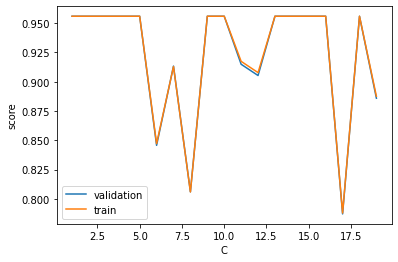

In [ ]:
## Test
model_svm = LinearSVC()
model_svm.fit(Xtrain, ytrain)

print('Train score : ', model_svm.score(Xtrain,ytrain))
print('Test score : ', model_svm.score(Xtest,ytest))

k_3 = np.arange(1,20)
tr_score_3, val_score_3 = validation_curve(model_svm, Xtrain, ytrain, 'C', k_3, cv = 5)

#5 splits sets de cross validation, on fait la moyenne des scores obtenus sur chacun des 5 splits

train = model_svm.predict(Xtrain)
predictions = model_svm.predict(Xtest)

plt.plot(k_3, val_score_3.mean(axis = 1), label = 'validation')
plt.plot(k_3, tr_score_3.mean(axis = 1), label = 'train')

plt.ylabel('score')
plt.xlabel('C')
plt.legend()

In [ ]:
soft_margin_range = [0.1, 1, 10, 100, 1000]
gamma_range = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['rbf']

svm_param_grid = dict(C=soft_margin_range, gamma=gamma_range, kernel=kernel)

print(svm_param_grid)

{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}


In [ ]:
grid_search_svm = GridSearchCV(SVC(), svm_param_grid, refit=True)
grid_search_svm.fit(X_ro, y_ro)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search_svm.cv_results_

{'mean_fit_time': array([1.78041801, 1.93417916, 1.19481912, 1.09108276, 1.08845463,
        0.99643264, 1.20818052, 0.87317595, 1.14958997, 1.08488693,
        0.94178963, 1.09591069, 0.6373364 , 1.31643691, 1.2260426 ,
        0.94025507, 1.10285974, 0.73894577, 2.33711314, 1.77005692,
        0.94372935, 1.09883599, 0.83319321, 9.41212654, 5.11418223]),
 'mean_score_time': array([0.31295333, 0.33257384, 0.18718486, 0.16410041, 0.17664833,
        0.17663245, 0.17552032, 0.1272635 , 0.15209842, 0.16505141,
        0.16778221, 0.16240745, 0.07462645, 0.14921794, 0.15800228,
        0.16696477, 0.16083207, 0.05940261, 0.1360589 , 0.15798669,
        0.16713071, 0.15786242, 0.05944209, 0.12964191, 0.15183954]),
 'mean_test_score': array([0.99289944, 0.97801693, 0.82564315, 0.78263349, 0.77266687,
        0.99986348, 0.99057862, 0.90224034, 0.79123604, 0.77853783,
        0.99986348, 0.99235374, 0.96176989, 0.83438119, 0.78795884,
        0.99986348, 0.99221722, 0.97201011, 0.88721927, 0

In [ ]:
scores_svm = grid_search_svm.cv_results_['mean_test_score']
print(scores_svm)

[0.99289944 0.97801693 0.82564315 0.78263349 0.77266687 0.99986348
 0.99057862 0.90224034 0.79123604 0.77853783 0.99986348 0.99235374
 0.96176989 0.83438119 0.78795884 0.99986348 0.99221722 0.97201011
 0.88721927 0.80161258 0.99986348 0.99221722 0.97351172 0.93022958
 0.82523331]


In [ ]:
print(grid_search_svm.best_score_)

print(grid_search_svm.best_params_)

best_params_svm = grid_search_svm.best_params_

0.9998634812286689
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
svm = SVC(C=1, gamma=1, kernel='rbf')
svm.fit(X_ro, y_ro)

predict_svm = svm.predict(Xtest)

In [ ]:
accuracy_score(predict_svm, ytest)

0.9374021909233177

In [ ]:
confusion_matrix(ytest, predict_svm)

array([[1198,    0],
       [  80,    0]])

In [ ]:
print(precision_score(ytest, predict_svm))
print(recall_score(ytest, predict_svm))
print(f1_score(ytest, predict_svm))

0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# entrainement du modèle de svm linéar classification
lsvc = LinearSVC()
lsvc.fit(X_ro, y_ro)RandomForestClassifier

#Affichage des résultats
y_pred = lsvc.predict(Xtest)

print(classification_report_imbalanced(ytest, y_pred))
